In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


This is a regression problem, where y = median_house_value, the value in which we would like to predict 

In [3]:
# Check the value counts of the none numeric column which we will need to alter in order to apply our machine learning model
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
# shuffle the dataset
df_shuffled = df.sample(n=len(df), random_state=1)
df_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [6]:
# now change the none numeric column 
pd.get_dummies(df_shuffled['ocean_proximity']).head()


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [10]:
# Convert the dummy DataFrame from boolean to integer
dummies = pd.get_dummies(df_shuffled.ocean_proximity)
dummies = dummies.astype(int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0
...,...,...,...,...,...
10955,1,0,0,0,0
17289,1,0,0,0,0
5192,1,0,0,0,0
12172,0,1,0,0,0


In [12]:
df_shuffled.drop('ocean_proximity', axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0
...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0


In [16]:
# join the dataframes
df_final = pd.concat(([df_shuffled.drop('ocean_proximity', axis=1),
                      dummies.astype(int)]), axis=1)
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [18]:
df_final=df_final[['longitude','latitude','housing_median_age','total_rooms',
                   'total_bedrooms','population','households','median_income',
                   '<1H OCEAN','INLAND',
                   'ISLAND','NEAR BAY','NEAR OCEAN','median_house_value']]
df_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [19]:
df_final=df_final.dropna()
len(df_final)

20433

Split into train, test, validation sets

In [54]:
train, test, val = df_final[:18000], df_final[18000:19217], df_final[19215:]
len(train), len(test), len(val)

(18000, 1217, 1218)

Convert to X and Y matrices

In [55]:
X_train, y_train = train.to_numpy()[:,:-1], train.to_numpy()[:,-1]
X_val, y_val = val.to_numpy()[:,:-1], val.to_numpy()[:,-1]
X_test, y_test = test.to_numpy()[:,:-1], test.to_numpy()[:,-1]
X_train
# X_train.shape

array([[-118.36,   34.06,   39.  , ...,    0.  ,    0.  ,    0.  ],
       [-119.78,   36.78,   37.  , ...,    0.  ,    0.  ,    0.  ],
       [-122.42,   37.73,   46.  , ...,    0.  ,    1.  ,    0.  ],
       ...,
       [-118.38,   34.07,   21.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.31,   34.07,   40.  , ...,    0.  ,    0.  ,    0.  ],
       [-117.72,   33.62,   21.  , ...,    0.  ,    0.  ,    0.  ]])

In [56]:
y_train
# y_train.shape

array([355000.,  70700., 229400., ..., 500001.,  70900., 110000.])

In [57]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [58]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler=StandardScaler().fit(X_train[:,:8])

def preprocessor(X):
    A = np.copy(X)
    A[:, :8]=scaler.transform(A[:, :8])
    return A
X_train, X_val, X_test = preprocessor(X_train),preprocessor(X_val),preprocessor(X_test)
X_train_preprocessed

array([[ 0.60344338, -0.73607301,  0.82084451, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10512186,  0.53710782,  0.66177382, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42245442,  0.98178495,  1.37759191, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.59346359, -0.7313922 , -0.61079167, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12738246, -0.7313922 ,  0.90037985, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92279673, -0.94202873, -0.61079167, ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
pd.DataFrame(X_train_preprocessed)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,0.728191,-0.815647,0.423168,-0.057912,0.134325,0.111802,0.120643,-0.349320,1.0,0.0,0.0,0.0,0.0
17996,-0.459404,0.785191,1.298057,-0.368023,-0.277849,-0.015390,-0.241986,-0.956265,0.0,1.0,0.0,0.0,0.0
17997,0.593464,-0.731392,-0.610792,0.468908,0.996794,0.077354,1.027213,-0.165155,1.0,0.0,0.0,0.0,0.0
17998,1.127382,-0.731392,0.900380,0.139013,0.463112,0.531359,0.464877,-0.923784,0.0,1.0,0.0,0.0,0.0


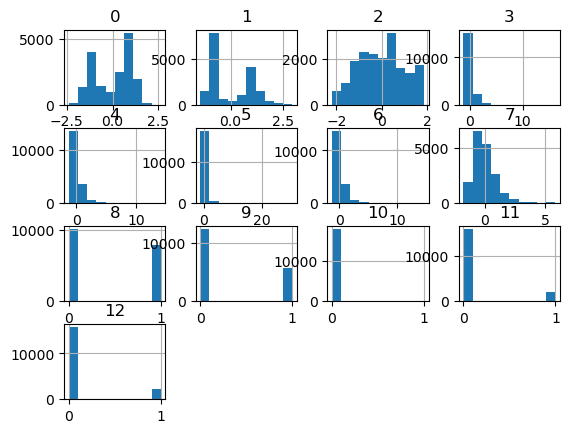

In [60]:
# visualise
pd.DataFrame(X_train_preprocessed).hist();

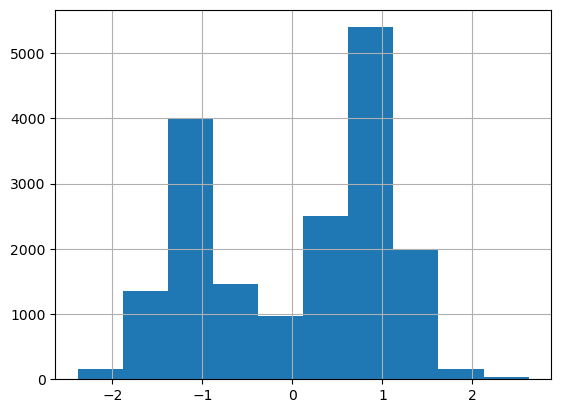

In [61]:
pd.DataFrame(X_train_preprocessed)[0].hist();

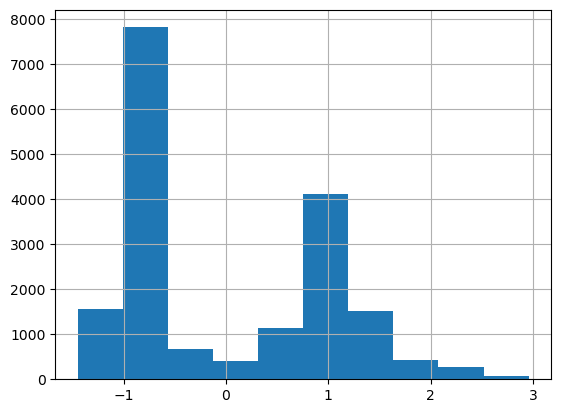

In [62]:
pd.DataFrame(X_train_preprocessed)[1].hist();

Mean Squared Error

In [65]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
mse(lr.predict(X_train),y_train, squared=False)
# or np.sqrt(mse)

C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


68593.05578127236

In [67]:
lr = LinearRegression().fit(X_train, y_train)
mse(lr.predict(X_train),y_train, squared=False), mse(lr.predict(X_val),y_val, squared=False)

C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(68593.05578127236, 71382.43558330165)

Probably not the best

Try KNN

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
mse(knn.predict(X_train),y_train, squared=False), mse(knn.predict(X_val),y_val, squared=False)
# increasing n should reduce overfitting

C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(53759.09908812057, 62161.22860469906)

Try Random Forest

In [77]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(max_depth=10).fit(X_train, y_train)
mse(rfr.predict(X_train),y_train, squared=False), mse(rfr.predict(X_val),y_val, squared=False)
# not bad?

C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(43610.8529877057, 53558.73433850915)

Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=250).fit(X_train, y_train)
mse(gbr.predict(X_train),y_train, squared=False), mse(gbr.predict(X_val),y_val, squared=False)


C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(47274.82259072157, 51251.09445642893)

Neural Networks

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError
simple_nn = Sequential()
simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp=ModelCheckpoint('models/simple_nn', save_best_only=True)
simple_nn.compile(optimizer=opt, loss='mse',metrics=[RootMeanSquaredError()])
simple_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
562/563 [============================>.] - ETA: 0s - loss: 50623098880.0000 - root_mean_squared_error: 224995.7812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 50640007168.0000 - root_mean_squared_error: 225033.3438 - val_loss: 41082404864.0000 - val_root_mean_squared_error: 202687.9531
Epoch 2/100
549/563 [============================>.] - ETA: 0s - loss: 31276034048.0000 - root_mean_squared_error: 176850.3125INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 31040950272.0000 - root_mean_squared_error: 176184.4219 - val_loss: 23800631296.0000 - val_root_mean_squared_error: 154274.5312
Epoch 3/100
561/563 [============================>.] - ETA: 0s - loss: 18974550016.0000 - root_mean_squared_error: 137748.1406INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 18979559424.0000 - root_mean_squared_error: 137766.3281 - val_loss: 13687355392.0000 - val_root_mean_squared_error: 116992.9688
Epoch 4/100
542/563 [===========================>..] - ETA: 0s - loss: 8992196608.0000 - root_mean_squared_error: 94827.1953INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 8848826368.0000 - root_mean_squared_error: 94068.2031 - val_loss: 5616344064.0000 - val_root_mean_squared_error: 74942.2734
Epoch 5/100
549/563 [============================>.] - ETA: 0s - loss: 5184801792.0000 - root_mean_squared_error: 72005.5703INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 5169420800.0000 - root_mean_squared_error: 71898.6875 - val_loss: 5218484224.0000 - val_root_mean_squared_error: 72239.0781
Epoch 6/100
553/563 [============================>.] - ETA: 0s - loss: 4893499392.0000 - root_mean_squared_error: 69953.5547INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4902246400.0000 - root_mean_squared_error: 70016.0469 - val_loss: 5156136960.0000 - val_root_mean_squared_error: 71806.2422
Epoch 7/100
560/563 [============================>.] - ETA: 0s - loss: 4804294144.0000 - root_mean_squared_error: 69313.0156INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4801345536.0000 - root_mean_squared_error: 69291.7422 - val_loss: 5090258944.0000 - val_root_mean_squared_error: 71346.0469
Epoch 8/100
563/563 [==============================] - 2s 3ms/step - loss: 4746035200.0000 - root_mean_squared_error: 68891.4766 - val_loss: 5103365120.0000 - val_root_mean_squared_error: 71437.8438
Epoch 9/100
562/563 [============================>.] - ETA: 0s - loss: 4712417792.0000 - root_mean_squared_error: 68647.0547INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4709817856.0000 - root_mean_squared_error: 68628.1094 - val_loss: 5070090752.0000 - val_root_mean_squared_error: 71204.5703
Epoch 10/100
561/563 [============================>.] - ETA: 0s - loss: 4683086336.0000 - root_mean_squared_error: 68433.0781INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4682247168.0000 - root_mean_squared_error: 68426.9453 - val_loss: 5065965056.0000 - val_root_mean_squared_error: 71175.5938
Epoch 11/100
554/563 [============================>.] - ETA: 0s - loss: 4666414592.0000 - root_mean_squared_error: 68311.1562INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4663819776.0000 - root_mean_squared_error: 68292.1641 - val_loss: 5039635968.0000 - val_root_mean_squared_error: 70990.3906
Epoch 12/100
563/563 [==============================] - ETA: 0s - loss: 4647217664.0000 - root_mean_squared_error: 68170.5078INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4647217664.0000 - root_mean_squared_error: 68170.5078 - val_loss: 5023345152.0000 - val_root_mean_squared_error: 70875.5625
Epoch 13/100
555/563 [============================>.] - ETA: 0s - loss: 4640189440.0000 - root_mean_squared_error: 68118.9375INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4635121152.0000 - root_mean_squared_error: 68081.7266 - val_loss: 5014219776.0000 - val_root_mean_squared_error: 70811.1562
Epoch 14/100
540/563 [===========================>..] - ETA: 0s - loss: 4590600704.0000 - root_mean_squared_error: 67753.9688INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4624171008.0000 - root_mean_squared_error: 68001.2578 - val_loss: 5010275840.0000 - val_root_mean_squared_error: 70783.3047
Epoch 15/100
540/563 [===========================>..] - ETA: 0s - loss: 4629405696.0000 - root_mean_squared_error: 68039.7344INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4615394304.0000 - root_mean_squared_error: 67936.6953 - val_loss: 5009340928.0000 - val_root_mean_squared_error: 70776.6953
Epoch 16/100
557/563 [============================>.] - ETA: 0s - loss: 4584878592.0000 - root_mean_squared_error: 67711.7344INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4606577152.0000 - root_mean_squared_error: 67871.7734 - val_loss: 4994285056.0000 - val_root_mean_squared_error: 70670.2578
Epoch 17/100
560/563 [============================>.] - ETA: 0s - loss: 4597456896.0000 - root_mean_squared_error: 67804.5469INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4601427456.0000 - root_mean_squared_error: 67833.8203 - val_loss: 4993153536.0000 - val_root_mean_squared_error: 70662.2500
Epoch 18/100
563/563 [==============================] - 2s 3ms/step - loss: 4594588160.0000 - root_mean_squared_error: 67783.3906 - val_loss: 4995693056.0000 - val_root_mean_squared_error: 70680.2188
Epoch 19/100
557/563 [============================>.] - ETA: 0s - loss: 4589688832.0000 - root_mean_squared_error: 67747.2422INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4587840000.0000 - root_mean_squared_error: 67733.5938 - val_loss: 4978372608.0000 - val_root_mean_squared_error: 70557.5859
Epoch 20/100
551/563 [============================>.] - ETA: 0s - loss: 4581679616.0000 - root_mean_squared_error: 67688.1016INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4583471104.0000 - root_mean_squared_error: 67701.3359 - val_loss: 4969654272.0000 - val_root_mean_squared_error: 70495.7734
Epoch 21/100
547/563 [============================>.] - ETA: 0s - loss: 4602542592.0000 - root_mean_squared_error: 67842.0391INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4578680832.0000 - root_mean_squared_error: 67665.9531 - val_loss: 4967240192.0000 - val_root_mean_squared_error: 70478.6484
Epoch 22/100
563/563 [==============================] - 1s 2ms/step - loss: 4573629440.0000 - root_mean_squared_error: 67628.6172 - val_loss: 4967346688.0000 - val_root_mean_squared_error: 70479.4062
Epoch 23/100
563/563 [==============================] - 1s 3ms/step - loss: 4569694208.0000 - root_mean_squared_error: 67599.5156 - val_loss: 4970158080.0000 - val_root_mean_squared_error: 70499.3516
Epoch 24/100
563/563 [==============================] - 1s 2ms/step - loss: 4562694656.0000 - root_mean_squared_error: 67547.7188 - val_loss: 4981724672.0000 - val_root_mean_squared_error: 70581.3359
Epoch 25/100
559/563 [============================>.] - ETA: 0s - loss: 4565859840.0000 - root_mean_squared_error: 67571.1484INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4559824384.0000 - root_mean_squared_error: 67526.4688 - val_loss: 4960958464.0000 - val_root_mean_squared_error: 70434.0703
Epoch 26/100
550/563 [============================>.] - ETA: 0s - loss: 4516482560.0000 - root_mean_squared_error: 67204.7812INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4553937920.0000 - root_mean_squared_error: 67482.8750 - val_loss: 4943201280.0000 - val_root_mean_squared_error: 70307.9062
Epoch 27/100
563/563 [==============================] - 1s 3ms/step - loss: 4548969472.0000 - root_mean_squared_error: 67446.0469 - val_loss: 4947059200.0000 - val_root_mean_squared_error: 70335.3359
Epoch 28/100
563/563 [==============================] - 1s 3ms/step - loss: 4545758720.0000 - root_mean_squared_error: 67422.2422 - val_loss: 4959486976.0000 - val_root_mean_squared_error: 70423.6250
Epoch 29/100
553/563 [============================>.] - ETA: 0s - loss: 4550498304.0000 - root_mean_squared_error: 67457.3828INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 4541433344.0000 - root_mean_squared_error: 67390.1562 - val_loss: 4929562624.0000 - val_root_mean_squared_error: 70210.8438
Epoch 30/100
563/563 [==============================] - 1s 3ms/step - loss: 4536755712.0000 - root_mean_squared_error: 67355.4453 - val_loss: 4945069568.0000 - val_root_mean_squared_error: 70321.1875
Epoch 31/100
563/563 [==============================] - 1s 3ms/step - loss: 4532623360.0000 - root_mean_squared_error: 67324.7578 - val_loss: 4946572288.0000 - val_root_mean_squared_error: 70331.8750
Epoch 32/100
563/563 [==============================] - 1s 3ms/step - loss: 4527836672.0000 - root_mean_squared_error: 67289.2031 - val_loss: 4934652928.0000 - val_root_mean_squared_error: 70247.0859
Epoch 33/100
561/563 [============================>.] - ETA: 0s - loss: 4528582144.0000 - root_mean_squared_error: 67294.7422INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4522692608.0000 - root_mean_squared_error: 67250.9688 - val_loss: 4927545344.0000 - val_root_mean_squared_error: 70196.4766
Epoch 34/100
538/563 [===========================>..] - ETA: 0s - loss: 4538751488.0000 - root_mean_squared_error: 67370.2578INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4521134080.0000 - root_mean_squared_error: 67239.3828 - val_loss: 4913058304.0000 - val_root_mean_squared_error: 70093.2109
Epoch 35/100
563/563 [==============================] - 1s 3ms/step - loss: 4514563072.0000 - root_mean_squared_error: 67190.5000 - val_loss: 4913964032.0000 - val_root_mean_squared_error: 70099.6719
Epoch 36/100
563/563 [==============================] - 1s 3ms/step - loss: 4510116864.0000 - root_mean_squared_error: 67157.4062 - val_loss: 4914958336.0000 - val_root_mean_squared_error: 70106.7656
Epoch 37/100
549/563 [============================>.] - ETA: 0s - loss: 4496233984.0000 - root_mean_squared_error: 67053.9609INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4506477056.0000 - root_mean_squared_error: 67130.2969 - val_loss: 4890903040.0000 - val_root_mean_squared_error: 69934.9922
Epoch 38/100
563/563 [==============================] - 1s 2ms/step - loss: 4502168576.0000 - root_mean_squared_error: 67098.2031 - val_loss: 4907833344.0000 - val_root_mean_squared_error: 70055.9297
Epoch 39/100
556/563 [============================>.] - ETA: 0s - loss: 4500393472.0000 - root_mean_squared_error: 67084.9688INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4498062336.0000 - root_mean_squared_error: 67067.5938 - val_loss: 4880138240.0000 - val_root_mean_squared_error: 69857.9844
Epoch 40/100
563/563 [==============================] - 2s 3ms/step - loss: 4493103616.0000 - root_mean_squared_error: 67030.6172 - val_loss: 4882863104.0000 - val_root_mean_squared_error: 69877.4844
Epoch 41/100
562/563 [============================>.] - ETA: 0s - loss: 4490854912.0000 - root_mean_squared_error: 67013.8438INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4488820736.0000 - root_mean_squared_error: 66998.6641 - val_loss: 4877016064.0000 - val_root_mean_squared_error: 69835.6328
Epoch 42/100
563/563 [==============================] - 1s 3ms/step - loss: 4483429376.0000 - root_mean_squared_error: 66958.4141 - val_loss: 4878869504.0000 - val_root_mean_squared_error: 69848.9062
Epoch 43/100
546/563 [============================>.] - ETA: 0s - loss: 4515618816.0000 - root_mean_squared_error: 67198.3516INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4482970112.0000 - root_mean_squared_error: 66954.9844 - val_loss: 4863816704.0000 - val_root_mean_squared_error: 69741.0703
Epoch 44/100
550/563 [============================>.] - ETA: 0s - loss: 4479928320.0000 - root_mean_squared_error: 66932.2656INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4475743232.0000 - root_mean_squared_error: 66900.9922 - val_loss: 4861459968.0000 - val_root_mean_squared_error: 69724.1719
Epoch 45/100
556/563 [============================>.] - ETA: 0s - loss: 4467267072.0000 - root_mean_squared_error: 66837.6172INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4472814080.0000 - root_mean_squared_error: 66879.1016 - val_loss: 4853827584.0000 - val_root_mean_squared_error: 69669.4141
Epoch 46/100
559/563 [============================>.] - ETA: 0s - loss: 4475577344.0000 - root_mean_squared_error: 66899.7578INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4467990016.0000 - root_mean_squared_error: 66843.0234 - val_loss: 4838952448.0000 - val_root_mean_squared_error: 69562.5781
Epoch 47/100
563/563 [==============================] - 1s 2ms/step - loss: 4463503360.0000 - root_mean_squared_error: 66809.4531 - val_loss: 4842591232.0000 - val_root_mean_squared_error: 69588.7266
Epoch 48/100
563/563 [==============================] - 1s 2ms/step - loss: 4460215808.0000 - root_mean_squared_error: 66784.8438 - val_loss: 4842485760.0000 - val_root_mean_squared_error: 69587.9688
Epoch 49/100
539/563 [===========================>..] - ETA: 0s - loss: 4447430656.0000 - root_mean_squared_error: 66689.0625INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4455840256.0000 - root_mean_squared_error: 66752.0781 - val_loss: 4834463744.0000 - val_root_mean_squared_error: 69530.3047
Epoch 50/100
548/563 [============================>.] - ETA: 0s - loss: 4465502720.0000 - root_mean_squared_error: 66824.4141INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4451988480.0000 - root_mean_squared_error: 66723.2266 - val_loss: 4830210048.0000 - val_root_mean_squared_error: 69499.7109
Epoch 51/100
563/563 [==============================] - 1s 2ms/step - loss: 4448845312.0000 - root_mean_squared_error: 66699.6641 - val_loss: 4838114816.0000 - val_root_mean_squared_error: 69556.5547
Epoch 52/100
563/563 [==============================] - 1s 2ms/step - loss: 4444303872.0000 - root_mean_squared_error: 66665.6094 - val_loss: 4835020800.0000 - val_root_mean_squared_error: 69534.3125
Epoch 53/100
551/563 [============================>.] - ETA: 0s - loss: 4435523584.0000 - root_mean_squared_error: 66599.7266INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4442746880.0000 - root_mean_squared_error: 66653.9375 - val_loss: 4816477696.0000 - val_root_mean_squared_error: 69400.8516
Epoch 54/100
537/563 [===========================>..] - ETA: 0s - loss: 4442253312.0000 - root_mean_squared_error: 66650.2344INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4437828096.0000 - root_mean_squared_error: 66617.0234 - val_loss: 4798884864.0000 - val_root_mean_squared_error: 69273.9844
Epoch 55/100
563/563 [==============================] - 1s 2ms/step - loss: 4434187776.0000 - root_mean_squared_error: 66589.6953 - val_loss: 4800600576.0000 - val_root_mean_squared_error: 69286.3672
Epoch 56/100
563/563 [==============================] - 1s 2ms/step - loss: 4430872064.0000 - root_mean_squared_error: 66564.7969 - val_loss: 4815429632.0000 - val_root_mean_squared_error: 69393.2969
Epoch 57/100
536/563 [===========================>..] - ETA: 0s - loss: 4425892864.0000 - root_mean_squared_error: 66527.3828INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4426769920.0000 - root_mean_squared_error: 66533.9766 - val_loss: 4789076480.0000 - val_root_mean_squared_error: 69203.1562
Epoch 58/100
563/563 [==============================] - 1s 3ms/step - loss: 4425076224.0000 - root_mean_squared_error: 66521.2500 - val_loss: 4790884864.0000 - val_root_mean_squared_error: 69216.2188
Epoch 59/100
563/563 [==============================] - 1s 2ms/step - loss: 4422251008.0000 - root_mean_squared_error: 66500.0078 - val_loss: 4808925184.0000 - val_root_mean_squared_error: 69346.4141
Epoch 60/100
563/563 [==============================] - 1s 3ms/step - loss: 4419449344.0000 - root_mean_squared_error: 66478.9375 - val_loss: 4800060928.0000 - val_root_mean_squared_error: 69282.4688
Epoch 61/100
556/563 [============================>.] - ETA: 0s - loss: 4427417088.0000 - root_mean_squared_error: 66538.8359INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4415482368.0000 - root_mean_squared_error: 66449.0938 - val_loss: 4765906432.0000 - val_root_mean_squared_error: 69035.5469
Epoch 62/100
563/563 [==============================] - 1s 2ms/step - loss: 4414096896.0000 - root_mean_squared_error: 66438.6719 - val_loss: 4782767104.0000 - val_root_mean_squared_error: 69157.5547
Epoch 63/100
563/563 [==============================] - 1s 3ms/step - loss: 4410369024.0000 - root_mean_squared_error: 66410.6094 - val_loss: 4768551936.0000 - val_root_mean_squared_error: 69054.7031
Epoch 64/100
563/563 [==============================] - 2s 3ms/step - loss: 4405814784.0000 - root_mean_squared_error: 66376.3125 - val_loss: 4767960064.0000 - val_root_mean_squared_error: 69050.4141
Epoch 65/100
563/563 [==============================] - 1s 3ms/step - loss: 4404545024.0000 - root_mean_squared_error: 66366.7500 - val_loss: 4779821568.0000 - val_root_mean_squared_error: 69136.2500
Epoch 66/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4395341824.0000 - root_mean_squared_error: 66297.3750 - val_loss: 4757712384.0000 - val_root_mean_squared_error: 68976.1719
Epoch 70/100
563/563 [==============================] - 2s 3ms/step - loss: 4392960000.0000 - root_mean_squared_error: 66279.4062 - val_loss: 4768595456.0000 - val_root_mean_squared_error: 69055.0156
Epoch 71/100
563/563 [==============================] - 1s 3ms/step - loss: 4389748736.0000 - root_mean_squared_error: 66255.1797 - val_loss: 4775454208.0000 - val_root_mean_squared_error: 69104.6641
Epoch 72/100
563/563 [==============================] - 2s 3ms/step - loss: 4386886656.0000 - root_mean_squared_error: 66233.5781 - val_loss: 4762633728.0000 - val_root_mean_squared_error: 69011.8359
Epoch 73/100
563/563 [==============================] - 1s 3ms/step - loss: 4387771904.0000 - root_mean_squared_error: 66240.2578 - val_loss: 4763595264.0000 - val_root_mean_squared_error: 69018.8047
Epoch 74/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4384587264.0000 - root_mean_squared_error: 66216.2188 - val_loss: 4748939776.0000 - val_root_mean_squared_error: 68912.5547
Epoch 75/100
560/563 [============================>.] - ETA: 0s - loss: 4387616256.0000 - root_mean_squared_error: 66239.0859INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4381575168.0000 - root_mean_squared_error: 66193.4688 - val_loss: 4736317440.0000 - val_root_mean_squared_error: 68820.9062
Epoch 76/100
542/563 [===========================>..] - ETA: 0s - loss: 4378519552.0000 - root_mean_squared_error: 66170.3828INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4380376064.0000 - root_mean_squared_error: 66184.4062 - val_loss: 4722431488.0000 - val_root_mean_squared_error: 68719.9531
Epoch 77/100
563/563 [==============================] - 1s 3ms/step - loss: 4377095168.0000 - root_mean_squared_error: 66159.6172 - val_loss: 4740316160.0000 - val_root_mean_squared_error: 68849.9531
Epoch 78/100
563/563 [==============================] - 1s 3ms/step - loss: 4374916096.0000 - root_mean_squared_error: 66143.1484 - val_loss: 4747379712.0000 - val_root_mean_squared_error: 68901.2344
Epoch 79/100
544/563 [===========================>..] - ETA: 0s - loss: 4369094144.0000 - root_mean_squared_error: 66099.1250INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4373730304.0000 - root_mean_squared_error: 66134.1875 - val_loss: 4713513984.0000 - val_root_mean_squared_error: 68655.0391
Epoch 80/100
563/563 [==============================] - 1s 2ms/step - loss: 4373311488.0000 - root_mean_squared_error: 66131.0156 - val_loss: 4717371904.0000 - val_root_mean_squared_error: 68683.1250
Epoch 81/100
563/563 [==============================] - 1s 2ms/step - loss: 4370210304.0000 - root_mean_squared_error: 66107.5625 - val_loss: 4717175296.0000 - val_root_mean_squared_error: 68681.6953
Epoch 82/100
563/563 [==============================] - 1s 2ms/step - loss: 4368048128.0000 - root_mean_squared_error: 66091.2109 - val_loss: 4725617152.0000 - val_root_mean_squared_error: 68743.1250
Epoch 83/100
563/563 [==============================] - 1s 2ms/step - loss: 4366005760.0000 - root_mean_squared_error: 66075.7578 - val_loss: 4723133440.0000 - val_root_mean_squared_error: 68725.0547
Epoch 84/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4360187904.0000 - root_mean_squared_error: 66031.7188 - val_loss: 4701389312.0000 - val_root_mean_squared_error: 68566.6797
Epoch 87/100
563/563 [==============================] - 2s 3ms/step - loss: 4360663552.0000 - root_mean_squared_error: 66035.3203 - val_loss: 4720851456.0000 - val_root_mean_squared_error: 68708.4531
Epoch 88/100
543/563 [===========================>..] - ETA: 0s - loss: 4366178816.0000 - root_mean_squared_error: 66077.0703INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4358890496.0000 - root_mean_squared_error: 66021.8906 - val_loss: 4697839616.0000 - val_root_mean_squared_error: 68540.7891
Epoch 89/100
563/563 [==============================] - 1s 3ms/step - loss: 4358288384.0000 - root_mean_squared_error: 66017.3359 - val_loss: 4708544000.0000 - val_root_mean_squared_error: 68618.8281
Epoch 90/100
563/563 [==============================] - 1s 3ms/step - loss: 4357051392.0000 - root_mean_squared_error: 66007.9609 - val_loss: 4698700288.0000 - val_root_mean_squared_error: 68547.0625
Epoch 91/100
563/563 [==============================] - 1s 3ms/step - loss: 4356498944.0000 - root_mean_squared_error: 66003.7812 - val_loss: 4708664832.0000 - val_root_mean_squared_error: 68619.7109
Epoch 92/100
563/563 [==============================] - 1s 3ms/step - loss: 4352107008.0000 - root_mean_squared_error: 65970.5000 - val_loss: 4719982592.0000 - val_root_mean_squared_error: 68702.1328
Epoch 93/100


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4350881280.0000 - root_mean_squared_error: 65961.2109 - val_loss: 4692501504.0000 - val_root_mean_squared_error: 68501.8359
Epoch 95/100
563/563 [==============================] - 1s 2ms/step - loss: 4348941312.0000 - root_mean_squared_error: 65946.5000 - val_loss: 4708926464.0000 - val_root_mean_squared_error: 68621.6172
Epoch 96/100
555/563 [============================>.] - ETA: 0s - loss: 4355269632.0000 - root_mean_squared_error: 65994.4688INFO:tensorflow:Assets written to: models\simple_nn\assets


INFO:tensorflow:Assets written to: models\simple_nn\assets


563/563 [==============================] - 2s 3ms/step - loss: 4347430400.0000 - root_mean_squared_error: 65935.0469 - val_loss: 4683663360.0000 - val_root_mean_squared_error: 68437.2969
Epoch 97/100
563/563 [==============================] - 1s 2ms/step - loss: 4347128320.0000 - root_mean_squared_error: 65932.7578 - val_loss: 4688067584.0000 - val_root_mean_squared_error: 68469.4609
Epoch 98/100
563/563 [==============================] - 1s 2ms/step - loss: 4346841600.0000 - root_mean_squared_error: 65930.5781 - val_loss: 4699923968.0000 - val_root_mean_squared_error: 68555.9922
Epoch 99/100
563/563 [==============================] - 1s 2ms/step - loss: 4344709120.0000 - root_mean_squared_error: 65914.4062 - val_loss: 4688601088.0000 - val_root_mean_squared_error: 68473.3594
Epoch 100/100
563/563 [==============================] - 1s 3ms/step - loss: 4343950336.0000 - root_mean_squared_error: 65908.6484 - val_loss: 4685441536.0000 - val_root_mean_squared_error: 68450.2812


In [85]:
from tensorflow.keras.models import load_model
simple_nn = load_model('models/simple_nn')
mse(simple_nn.predict(X_train),y_train, squared=False), mse(simple_nn.predict(X_val),y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(65968.06744591678, 68437.29624796427)

In [87]:
medium_nn = Sequential()
medium_nn.add(InputLayer((13,)))
medium_nn.add(Dense(32,'relu'))
medium_nn.add(Dense(16,'relu'))
medium_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp=ModelCheckpoint('models/medium_nn', save_best_only=True)
medium_nn.compile(optimizer=opt, loss='mse',metrics=[RootMeanSquaredError()])
medium_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
538/563 [===========================>..] - ETA: 0s - loss: 8925750272.0000 - root_mean_squared_error: 94476.1875INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 4ms/step - loss: 8737693696.0000 - root_mean_squared_error: 93475.6328 - val_loss: 4837974016.0000 - val_root_mean_squared_error: 69555.5469
Epoch 2/100
554/563 [============================>.] - ETA: 0s - loss: 4473001984.0000 - root_mean_squared_error: 66880.5078INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4473704960.0000 - root_mean_squared_error: 66885.7578 - val_loss: 4711071232.0000 - val_root_mean_squared_error: 68637.2422
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 4354718208.0000 - root_mean_squared_error: 65990.2891 - val_loss: 4887156736.0000 - val_root_mean_squared_error: 69908.2031
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 4303032832.0000 - root_mean_squared_error: 65597.5078 - val_loss: 4889251840.0000 - val_root_mean_squared_error: 69923.1875
Epoch 5/100
558/563 [============================>.] - ETA: 0s - loss: 4249275392.0000 - root_mean_squared_error: 65186.4648INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4242768640.0000 - root_mean_squared_error: 65136.5391 - val_loss: 4509530624.0000 - val_root_mean_squared_error: 67153.0391
Epoch 6/100
563/563 [==============================] - 2s 3ms/step - loss: 4204839680.0000 - root_mean_squared_error: 64844.7344 - val_loss: 4663611904.0000 - val_root_mean_squared_error: 68290.6406
Epoch 7/100
560/563 [============================>.] - ETA: 0s - loss: 4176586240.0000 - root_mean_squared_error: 64626.5117INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4180687872.0000 - root_mean_squared_error: 64658.2383 - val_loss: 4445767168.0000 - val_root_mean_squared_error: 66676.5859
Epoch 8/100
561/563 [============================>.] - ETA: 0s - loss: 4149369856.0000 - root_mean_squared_error: 64415.6016INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 4146679552.0000 - root_mean_squared_error: 64394.7188 - val_loss: 4251353600.0000 - val_root_mean_squared_error: 65202.4062
Epoch 9/100
563/563 [==============================] - 2s 3ms/step - loss: 4132171008.0000 - root_mean_squared_error: 64281.9648 - val_loss: 4330715136.0000 - val_root_mean_squared_error: 65808.1719
Epoch 10/100
563/563 [==============================] - 2s 3ms/step - loss: 4085715456.0000 - root_mean_squared_error: 63919.6016 - val_loss: 4464776704.0000 - val_root_mean_squared_error: 66818.9844
Epoch 11/100
563/563 [==============================] - 2s 3ms/step - loss: 4092572160.0000 - root_mean_squared_error: 63973.2148 - val_loss: 4782584832.0000 - val_root_mean_squared_error: 69156.2344
Epoch 12/100
563/563 [==============================] - 2s 3ms/step - loss: 4102940416.0000 - root_mean_squared_error: 64054.1992 - val_loss: 4291558912.0000 - val_root_mean_squared_error: 65509.9922
Epoch 13/100
5

INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3777810944.0000 - root_mean_squared_error: 61463.8984 - val_loss: 4002612480.0000 - val_root_mean_squared_error: 63266.2031
Epoch 25/100
563/563 [==============================] - 2s 3ms/step - loss: 3683817216.0000 - root_mean_squared_error: 60694.4570 - val_loss: 4024476416.0000 - val_root_mean_squared_error: 63438.7617
Epoch 26/100
560/563 [============================>.] - ETA: 0s - loss: 3557120000.0000 - root_mean_squared_error: 59641.5977INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3576286208.0000 - root_mean_squared_error: 59802.0586 - val_loss: 3944353280.0000 - val_root_mean_squared_error: 62804.0859
Epoch 27/100
563/563 [==============================] - 2s 3ms/step - loss: 3496641280.0000 - root_mean_squared_error: 59132.4062 - val_loss: 4072300800.0000 - val_root_mean_squared_error: 63814.5820
Epoch 28/100
554/563 [============================>.] - ETA: 0s - loss: 3467511296.0000 - root_mean_squared_error: 58885.5781INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3462606592.0000 - root_mean_squared_error: 58843.9180 - val_loss: 3841901056.0000 - val_root_mean_squared_error: 61983.0703
Epoch 29/100
563/563 [==============================] - 2s 3ms/step - loss: 3401472768.0000 - root_mean_squared_error: 58322.1445 - val_loss: 3896499456.0000 - val_root_mean_squared_error: 62421.9453
Epoch 30/100
563/563 [==============================] - 2s 3ms/step - loss: 3388630016.0000 - root_mean_squared_error: 58211.9414 - val_loss: 3900897792.0000 - val_root_mean_squared_error: 62457.1680
Epoch 31/100
549/563 [============================>.] - ETA: 0s - loss: 3329356800.0000 - root_mean_squared_error: 57700.5781INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3335503360.0000 - root_mean_squared_error: 57753.8164 - val_loss: 3692781568.0000 - val_root_mean_squared_error: 60768.2617
Epoch 32/100
563/563 [==============================] - 2s 3ms/step - loss: 3320180736.0000 - root_mean_squared_error: 57621.0078 - val_loss: 3750928640.0000 - val_root_mean_squared_error: 61244.8242
Epoch 33/100
560/563 [============================>.] - ETA: 0s - loss: 3303008512.0000 - root_mean_squared_error: 57471.8047INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3298115328.0000 - root_mean_squared_error: 57429.2188 - val_loss: 3615400448.0000 - val_root_mean_squared_error: 60128.1992
Epoch 34/100
554/563 [============================>.] - ETA: 0s - loss: 3259116544.0000 - root_mean_squared_error: 57088.6719INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3266826752.0000 - root_mean_squared_error: 57156.1602 - val_loss: 3562210048.0000 - val_root_mean_squared_error: 59684.2539
Epoch 35/100
563/563 [==============================] - 2s 3ms/step - loss: 3245730816.0000 - root_mean_squared_error: 56971.3164 - val_loss: 3593366528.0000 - val_root_mean_squared_error: 59944.6953
Epoch 36/100
563/563 [==============================] - 2s 3ms/step - loss: 3219416576.0000 - root_mean_squared_error: 56739.9023 - val_loss: 3646240512.0000 - val_root_mean_squared_error: 60384.1094
Epoch 37/100
561/563 [============================>.] - ETA: 0s - loss: 3195170304.0000 - root_mean_squared_error: 56525.8359INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3197524736.0000 - root_mean_squared_error: 56546.6602 - val_loss: 3557325824.0000 - val_root_mean_squared_error: 59643.3203
Epoch 38/100
563/563 [==============================] - 2s 3ms/step - loss: 3173410816.0000 - root_mean_squared_error: 56333.0352 - val_loss: 3568076544.0000 - val_root_mean_squared_error: 59733.3789
Epoch 39/100
550/563 [============================>.] - ETA: 0s - loss: 3164074240.0000 - root_mean_squared_error: 56250.1055INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3159102976.0000 - root_mean_squared_error: 56205.8984 - val_loss: 3514282496.0000 - val_root_mean_squared_error: 59281.3828
Epoch 40/100
544/563 [===========================>..] - ETA: 0s - loss: 3153374976.0000 - root_mean_squared_error: 56154.9180INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3141476608.0000 - root_mean_squared_error: 56048.8789 - val_loss: 3485261568.0000 - val_root_mean_squared_error: 59036.1055
Epoch 41/100
563/563 [==============================] - 2s 3ms/step - loss: 3135078400.0000 - root_mean_squared_error: 55991.7695 - val_loss: 3512173056.0000 - val_root_mean_squared_error: 59263.5898
Epoch 42/100
557/563 [============================>.] - ETA: 0s - loss: 3076011776.0000 - root_mean_squared_error: 55461.8047INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3087349760.0000 - root_mean_squared_error: 55563.9258 - val_loss: 3422576640.0000 - val_root_mean_squared_error: 58502.7930
Epoch 43/100
563/563 [==============================] - 2s 3ms/step - loss: 3093616384.0000 - root_mean_squared_error: 55620.2891 - val_loss: 3444024320.0000 - val_root_mean_squared_error: 58685.8086
Epoch 44/100
563/563 [==============================] - 1s 3ms/step - loss: 3052597248.0000 - root_mean_squared_error: 55250.3164 - val_loss: 3686403328.0000 - val_root_mean_squared_error: 60715.7578
Epoch 45/100
557/563 [============================>.] - ETA: 0s - loss: 3048057600.0000 - root_mean_squared_error: 55209.2148INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 3047915520.0000 - root_mean_squared_error: 55207.9297 - val_loss: 3417384704.0000 - val_root_mean_squared_error: 58458.4023
Epoch 46/100
563/563 [==============================] - 2s 3ms/step - loss: 3063415552.0000 - root_mean_squared_error: 55348.1289 - val_loss: 3422540032.0000 - val_root_mean_squared_error: 58502.4805
Epoch 47/100
563/563 [==============================] - 2s 3ms/step - loss: 3012209664.0000 - root_mean_squared_error: 54883.6016 - val_loss: 3471661056.0000 - val_root_mean_squared_error: 58920.8047
Epoch 48/100
563/563 [==============================] - 2s 3ms/step - loss: 3001376256.0000 - root_mean_squared_error: 54784.8164 - val_loss: 3442094592.0000 - val_root_mean_squared_error: 58669.3672
Epoch 49/100
541/563 [===========================>..] - ETA: 0s - loss: 3006446336.0000 - root_mean_squared_error: 54831.0703INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2998817024.0000 - root_mean_squared_error: 54761.4570 - val_loss: 3386517504.0000 - val_root_mean_squared_error: 58193.7930
Epoch 50/100
563/563 [==============================] - 2s 3ms/step - loss: 2988527104.0000 - root_mean_squared_error: 54667.4219 - val_loss: 3580440064.0000 - val_root_mean_squared_error: 59836.7773
Epoch 51/100
545/563 [============================>.] - ETA: 0s - loss: 2989728256.0000 - root_mean_squared_error: 54678.4062INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2993882368.0000 - root_mean_squared_error: 54716.3828 - val_loss: 3340975616.0000 - val_root_mean_squared_error: 57801.1719
Epoch 52/100
563/563 [==============================] - 2s 3ms/step - loss: 2957469184.0000 - root_mean_squared_error: 54382.6172 - val_loss: 3467857408.0000 - val_root_mean_squared_error: 58888.5156
Epoch 53/100
563/563 [==============================] - 2s 3ms/step - loss: 2950621440.0000 - root_mean_squared_error: 54319.6211 - val_loss: 3723597568.0000 - val_root_mean_squared_error: 61021.2891
Epoch 54/100
563/563 [==============================] - 2s 3ms/step - loss: 2957387776.0000 - root_mean_squared_error: 54381.8711 - val_loss: 3544481536.0000 - val_root_mean_squared_error: 59535.5469
Epoch 55/100
563/563 [==============================] - 2s 3ms/step - loss: 2929957376.0000 - root_mean_squared_error: 54129.0820 - val_loss: 3366034176.0000 - val_root_mean_squared_error: 58017.5352
Epoch 56/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2921602304.0000 - root_mean_squared_error: 54051.8477 - val_loss: 3294754048.0000 - val_root_mean_squared_error: 57399.9492
Epoch 58/100
563/563 [==============================] - 2s 3ms/step - loss: 2930288384.0000 - root_mean_squared_error: 54132.1367 - val_loss: 3464144384.0000 - val_root_mean_squared_error: 58856.9844
Epoch 59/100
563/563 [==============================] - 2s 3ms/step - loss: 2900103680.0000 - root_mean_squared_error: 53852.6094 - val_loss: 3365245952.0000 - val_root_mean_squared_error: 58010.7383
Epoch 60/100
563/563 [==============================] - 2s 3ms/step - loss: 2912088320.0000 - root_mean_squared_error: 53963.7695 - val_loss: 3299787520.0000 - val_root_mean_squared_error: 57443.7773
Epoch 61/100
563/563 [==============================] - 2s 3ms/step - loss: 2895011840.0000 - root_mean_squared_error: 53805.3125 - val_loss: 3522266880.0000 - val_root_mean_squared_error: 59348.6875
Epoch 62/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2875574016.0000 - root_mean_squared_error: 53624.3789 - val_loss: 3227251712.0000 - val_root_mean_squared_error: 56808.9062
Epoch 65/100
563/563 [==============================] - 1s 3ms/step - loss: 2883193600.0000 - root_mean_squared_error: 53695.3789 - val_loss: 3311093760.0000 - val_root_mean_squared_error: 57542.1055
Epoch 66/100
563/563 [==============================] - 1s 3ms/step - loss: 2857662208.0000 - root_mean_squared_error: 53457.1055 - val_loss: 3324808448.0000 - val_root_mean_squared_error: 57661.1523
Epoch 67/100
563/563 [==============================] - 2s 3ms/step - loss: 2870270208.0000 - root_mean_squared_error: 53574.9023 - val_loss: 3275186688.0000 - val_root_mean_squared_error: 57229.2461
Epoch 68/100
563/563 [==============================] - 2s 3ms/step - loss: 2882369792.0000 - root_mean_squared_error: 53687.7070 - val_loss: 3472224256.0000 - val_root_mean_squared_error: 58925.5820
Epoch 69/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2799001600.0000 - root_mean_squared_error: 52905.5898 - val_loss: 3195815936.0000 - val_root_mean_squared_error: 56531.5469
Epoch 77/100
563/563 [==============================] - 2s 3ms/step - loss: 2814495744.0000 - root_mean_squared_error: 53051.8203 - val_loss: 3324779776.0000 - val_root_mean_squared_error: 57660.9023
Epoch 78/100
563/563 [==============================] - 2s 3ms/step - loss: 2799706880.0000 - root_mean_squared_error: 52912.2578 - val_loss: 3387362560.0000 - val_root_mean_squared_error: 58201.0547
Epoch 79/100
560/563 [============================>.] - ETA: 0s - loss: 2813722112.0000 - root_mean_squared_error: 53044.5312INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2814283776.0000 - root_mean_squared_error: 53049.8242 - val_loss: 3153849600.0000 - val_root_mean_squared_error: 56159.1445
Epoch 80/100
563/563 [==============================] - 1s 3ms/step - loss: 2795972608.0000 - root_mean_squared_error: 52876.9570 - val_loss: 3309894912.0000 - val_root_mean_squared_error: 57531.6875
Epoch 81/100
549/563 [============================>.] - ETA: 0s - loss: 2779235072.0000 - root_mean_squared_error: 52718.4492INFO:tensorflow:Assets written to: models\medium_nn\assets


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2776204800.0000 - root_mean_squared_error: 52689.7031 - val_loss: 3126048000.0000 - val_root_mean_squared_error: 55911.0703
Epoch 82/100
563/563 [==============================] - 2s 3ms/step - loss: 2760640768.0000 - root_mean_squared_error: 52541.8008 - val_loss: 3130951680.0000 - val_root_mean_squared_error: 55954.9062
Epoch 83/100
563/563 [==============================] - 2s 3ms/step - loss: 2767485440.0000 - root_mean_squared_error: 52606.8945 - val_loss: 3250955264.0000 - val_root_mean_squared_error: 57017.1484
Epoch 84/100
563/563 [==============================] - 2s 3ms/step - loss: 2785366016.0000 - root_mean_squared_error: 52776.5664 - val_loss: 3191609600.0000 - val_root_mean_squared_error: 56494.3320
Epoch 85/100
563/563 [==============================] - 2s 3ms/step - loss: 2778089984.0000 - root_mean_squared_error: 52707.5898 - val_loss: 3169524224.0000 - val_root_mean_squared_error: 56298.5273
Epoch 86/100


INFO:tensorflow:Assets written to: models\medium_nn\assets


563/563 [==============================] - 2s 4ms/step - loss: 2757830144.0000 - root_mean_squared_error: 52515.0469 - val_loss: 3109668864.0000 - val_root_mean_squared_error: 55764.4062
Epoch 89/100
563/563 [==============================] - 2s 3ms/step - loss: 2774049536.0000 - root_mean_squared_error: 52669.2461 - val_loss: 3208993536.0000 - val_root_mean_squared_error: 56647.9805
Epoch 90/100
563/563 [==============================] - 2s 3ms/step - loss: 2754207488.0000 - root_mean_squared_error: 52480.5430 - val_loss: 3171770112.0000 - val_root_mean_squared_error: 56318.4688
Epoch 91/100
563/563 [==============================] - 2s 3ms/step - loss: 2755046400.0000 - root_mean_squared_error: 52488.5352 - val_loss: 3263268352.0000 - val_root_mean_squared_error: 57125.0234
Epoch 92/100
563/563 [==============================] - 2s 3ms/step - loss: 2750505984.0000 - root_mean_squared_error: 52445.2656 - val_loss: 3201552896.0000 - val_root_mean_squared_error: 56582.2656
Epoch 93/100


In [88]:
# validation down to 56k but overfitting
medium_nn = load_model('models/medium_nn')
mse(medium_nn.predict(X_train),y_train, squared=False), mse(medium_nn.predict(X_val),y_val, squared=False)

39/39 [==============================] - 0s 2ms/step


C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(51568.74456090659, 55764.40572067068)

In [89]:
large_nn = Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256,'relu'))
large_nn.add(Dense(128,'relu'))
large_nn.add(Dense(64,'relu'))
large_nn.add(Dense(32,'relu'))
large_nn.add(Dense(1, 'linear'))

opt = Adam(learning_rate=.1)
cp=ModelCheckpoint('models/large_nn', save_best_only=True)
large_nn.compile(optimizer=opt, loss='mse',metrics=[RootMeanSquaredError()])
large_nn.fit(x=X_train, y=y_train, validation_data=(X_val, y_val), callbacks=[cp], epochs=100)

Epoch 1/100
559/563 [============================>.] - ETA: 0s - loss: 7835263488.0000 - root_mean_squared_error: 88517.0234INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 5ms/step - loss: 7815213568.0000 - root_mean_squared_error: 88403.6953 - val_loss: 5102981632.0000 - val_root_mean_squared_error: 71435.1562
Epoch 2/100
556/563 [============================>.] - ETA: 0s - loss: 4352870912.0000 - root_mean_squared_error: 65976.2891INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4347841536.0000 - root_mean_squared_error: 65938.1641 - val_loss: 4390394880.0000 - val_root_mean_squared_error: 66260.0547
Epoch 3/100
550/563 [============================>.] - ETA: 0s - loss: 4116883456.0000 - root_mean_squared_error: 64162.9453INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 4116364032.0000 - root_mean_squared_error: 64158.8984 - val_loss: 4177103616.0000 - val_root_mean_squared_error: 64630.5156
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 3852851200.0000 - root_mean_squared_error: 62071.3398 - val_loss: 4431904256.0000 - val_root_mean_squared_error: 66572.5469
Epoch 5/100
563/563 [==============================] - 2s 4ms/step - loss: 3872319744.0000 - root_mean_squared_error: 62227.9648 - val_loss: 4196351232.0000 - val_root_mean_squared_error: 64779.2500
Epoch 6/100
563/563 [==============================] - 2s 4ms/step - loss: 3626622464.0000 - root_mean_squared_error: 60221.4453 - val_loss: 4239478784.0000 - val_root_mean_squared_error: 65111.2812
Epoch 7/100
554/563 [============================>.] - ETA: 0s - loss: 3556264448.0000 - root_mean_squared_error: 59634.4219INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3555677952.0000 - root_mean_squared_error: 59629.5039 - val_loss: 3874759424.0000 - val_root_mean_squared_error: 62247.5664
Epoch 8/100
558/563 [============================>.] - ETA: 0s - loss: 3432041472.0000 - root_mean_squared_error: 58583.6289INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3435695360.0000 - root_mean_squared_error: 58614.8047 - val_loss: 3729257472.0000 - val_root_mean_squared_error: 61067.6484
Epoch 9/100
563/563 [==============================] - 2s 4ms/step - loss: 3409658368.0000 - root_mean_squared_error: 58392.2812 - val_loss: 3816747264.0000 - val_root_mean_squared_error: 61779.8281
Epoch 10/100
563/563 [==============================] - 2s 4ms/step - loss: 3390503680.0000 - root_mean_squared_error: 58228.0312 - val_loss: 3730012928.0000 - val_root_mean_squared_error: 61073.8320
Epoch 11/100
550/563 [============================>.] - ETA: 0s - loss: 3325501952.0000 - root_mean_squared_error: 57667.1641INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3326869760.0000 - root_mean_squared_error: 57679.0234 - val_loss: 3519873024.0000 - val_root_mean_squared_error: 59328.5195
Epoch 12/100
563/563 [==============================] - 2s 4ms/step - loss: 3266469376.0000 - root_mean_squared_error: 57153.0352 - val_loss: 3936377856.0000 - val_root_mean_squared_error: 62740.5586
Epoch 13/100
563/563 [==============================] - 2s 4ms/step - loss: 3243939840.0000 - root_mean_squared_error: 56955.5938 - val_loss: 3562772992.0000 - val_root_mean_squared_error: 59688.9688
Epoch 14/100
548/563 [============================>.] - ETA: 0s - loss: 3191980800.0000 - root_mean_squared_error: 56497.6172INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3192791296.0000 - root_mean_squared_error: 56504.7891 - val_loss: 3488637696.0000 - val_root_mean_squared_error: 59064.6914
Epoch 15/100
563/563 [==============================] - 2s 4ms/step - loss: 3076580608.0000 - root_mean_squared_error: 55466.9336 - val_loss: 3520061440.0000 - val_root_mean_squared_error: 59330.1055
Epoch 16/100
563/563 [==============================] - 2s 4ms/step - loss: 3112417792.0000 - root_mean_squared_error: 55789.0469 - val_loss: 3548230144.0000 - val_root_mean_squared_error: 59567.0234
Epoch 17/100
558/563 [============================>.] - ETA: 0s - loss: 3131459584.0000 - root_mean_squared_error: 55959.4453INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3131519232.0000 - root_mean_squared_error: 55959.9805 - val_loss: 3488432896.0000 - val_root_mean_squared_error: 59062.9570
Epoch 18/100
554/563 [============================>.] - ETA: 0s - loss: 3175702016.0000 - root_mean_squared_error: 56353.3672INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 3163804160.0000 - root_mean_squared_error: 56247.7031 - val_loss: 3394623232.0000 - val_root_mean_squared_error: 58263.3945
Epoch 19/100
562/563 [============================>.] - ETA: 0s - loss: 3137073408.0000 - root_mean_squared_error: 56009.5820INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 3136379392.0000 - root_mean_squared_error: 56003.3867 - val_loss: 3344917760.0000 - val_root_mean_squared_error: 57835.2656
Epoch 20/100
563/563 [==============================] - 2s 4ms/step - loss: 3044925184.0000 - root_mean_squared_error: 55180.8398 - val_loss: 3446629120.0000 - val_root_mean_squared_error: 58708.0000
Epoch 21/100
563/563 [==============================] - 2s 4ms/step - loss: 3020678656.0000 - root_mean_squared_error: 54960.6992 - val_loss: 3544806656.0000 - val_root_mean_squared_error: 59538.2773
Epoch 22/100
560/563 [============================>.] - ETA: 0s - loss: 3002129408.0000 - root_mean_squared_error: 54791.6914INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 6ms/step - loss: 3002247936.0000 - root_mean_squared_error: 54792.7734 - val_loss: 3344642816.0000 - val_root_mean_squared_error: 57832.8867
Epoch 23/100
563/563 [==============================] - 2s 4ms/step - loss: 2897464064.0000 - root_mean_squared_error: 53828.0977 - val_loss: 3545288192.0000 - val_root_mean_squared_error: 59542.3242
Epoch 24/100
560/563 [============================>.] - ETA: 0s - loss: 2977685248.0000 - root_mean_squared_error: 54568.1719INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 2978164480.0000 - root_mean_squared_error: 54572.5625 - val_loss: 3334580736.0000 - val_root_mean_squared_error: 57745.8281
Epoch 25/100
563/563 [==============================] - 2s 4ms/step - loss: 2889087488.0000 - root_mean_squared_error: 53750.2344 - val_loss: 3535224832.0000 - val_root_mean_squared_error: 59457.7578
Epoch 26/100
563/563 [==============================] - 2s 4ms/step - loss: 2925539072.0000 - root_mean_squared_error: 54088.2539 - val_loss: 4288040960.0000 - val_root_mean_squared_error: 65483.1367
Epoch 27/100
561/563 [============================>.] - ETA: 0s - loss: 2903437056.0000 - root_mean_squared_error: 53883.5508INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 4s 6ms/step - loss: 2902393088.0000 - root_mean_squared_error: 53873.8633 - val_loss: 3156604160.0000 - val_root_mean_squared_error: 56183.6641
Epoch 28/100
563/563 [==============================] - 2s 4ms/step - loss: 2866942208.0000 - root_mean_squared_error: 53543.8359 - val_loss: 3324844800.0000 - val_root_mean_squared_error: 57661.4688
Epoch 29/100
562/563 [============================>.] - ETA: 0s - loss: 2836304128.0000 - root_mean_squared_error: 53256.9648INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 2835140096.0000 - root_mean_squared_error: 53246.0352 - val_loss: 3077857792.0000 - val_root_mean_squared_error: 55478.4453
Epoch 30/100
563/563 [==============================] - 2s 4ms/step - loss: 2940168448.0000 - root_mean_squared_error: 54223.3203 - val_loss: 3211276288.0000 - val_root_mean_squared_error: 56668.1250
Epoch 31/100
563/563 [==============================] - 2s 4ms/step - loss: 2844672512.0000 - root_mean_squared_error: 53335.4727 - val_loss: 3222395648.0000 - val_root_mean_squared_error: 56766.1484
Epoch 32/100
563/563 [==============================] - 2s 4ms/step - loss: 2844888320.0000 - root_mean_squared_error: 53337.4961 - val_loss: 3675553280.0000 - val_root_mean_squared_error: 60626.3398
Epoch 33/100
563/563 [==============================] - 2s 4ms/step - loss: 2803268096.0000 - root_mean_squared_error: 52945.8984 - val_loss: 3169078016.0000 - val_root_mean_squared_error: 56294.5664
Epoch 34/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 6ms/step - loss: 2750944768.0000 - root_mean_squared_error: 52449.4492 - val_loss: 3035986176.0000 - val_root_mean_squared_error: 55099.7852
Epoch 35/100
563/563 [==============================] - 2s 4ms/step - loss: 2780993792.0000 - root_mean_squared_error: 52735.1289 - val_loss: 3201733632.0000 - val_root_mean_squared_error: 56583.8633
Epoch 36/100
563/563 [==============================] - 2s 4ms/step - loss: 2741376512.0000 - root_mean_squared_error: 52358.1562 - val_loss: 3247164416.0000 - val_root_mean_squared_error: 56983.8945
Epoch 37/100
563/563 [==============================] - 2s 4ms/step - loss: 2716484352.0000 - root_mean_squared_error: 52119.9023 - val_loss: 3629326848.0000 - val_root_mean_squared_error: 60243.8945
Epoch 38/100
563/563 [==============================] - 2s 4ms/step - loss: 2755229696.0000 - root_mean_squared_error: 52490.2812 - val_loss: 3142341376.0000 - val_root_mean_squared_error: 56056.5898
Epoch 39/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2696081664.0000 - root_mean_squared_error: 51923.8047 - val_loss: 2967174400.0000 - val_root_mean_squared_error: 54471.7773
Epoch 47/100
563/563 [==============================] - 2s 4ms/step - loss: 2654860800.0000 - root_mean_squared_error: 51525.3398 - val_loss: 3207424000.0000 - val_root_mean_squared_error: 56634.1250
Epoch 48/100
563/563 [==============================] - 2s 4ms/step - loss: 2858956288.0000 - root_mean_squared_error: 53469.2070 - val_loss: 3535729408.0000 - val_root_mean_squared_error: 59462.0000
Epoch 49/100
563/563 [==============================] - 2s 4ms/step - loss: 2912514560.0000 - root_mean_squared_error: 53967.7188 - val_loss: 3249184000.0000 - val_root_mean_squared_error: 57001.6133
Epoch 50/100
548/563 [============================>.] - ETA: 0s - loss: 2644813312.0000 - root_mean_squared_error: 51427.7500INFO:tensorflow:Assets written to: models\large_nn\assets


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2645289472.0000 - root_mean_squared_error: 51432.3789 - val_loss: 2923832832.0000 - val_root_mean_squared_error: 54072.4766
Epoch 51/100
563/563 [==============================] - 2s 4ms/step - loss: 2621604352.0000 - root_mean_squared_error: 51201.6055 - val_loss: 3430941952.0000 - val_root_mean_squared_error: 58574.2422
Epoch 52/100
563/563 [==============================] - 2s 4ms/step - loss: 2627844352.0000 - root_mean_squared_error: 51262.5039 - val_loss: 3176210688.0000 - val_root_mean_squared_error: 56357.8789
Epoch 53/100
563/563 [==============================] - 2s 3ms/step - loss: 2608306944.0000 - root_mean_squared_error: 51071.5859 - val_loss: 3080688384.0000 - val_root_mean_squared_error: 55503.9492
Epoch 54/100
563/563 [==============================] - 2s 3ms/step - loss: 2635063296.0000 - root_mean_squared_error: 51332.8672 - val_loss: 3571047424.0000 - val_root_mean_squared_error: 59758.2422
Epoch 55/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 4ms/step - loss: 2675602688.0000 - root_mean_squared_error: 51726.2266 - val_loss: 2903036672.0000 - val_root_mean_squared_error: 53879.8359
Epoch 72/100
563/563 [==============================] - 2s 3ms/step - loss: 2694183168.0000 - root_mean_squared_error: 51905.5234 - val_loss: 2951277568.0000 - val_root_mean_squared_error: 54325.6641
Epoch 73/100
563/563 [==============================] - 2s 3ms/step - loss: 2552248320.0000 - root_mean_squared_error: 50519.7812 - val_loss: 3065378560.0000 - val_root_mean_squared_error: 55365.8594
Epoch 74/100
563/563 [==============================] - 2s 3ms/step - loss: 2589751040.0000 - root_mean_squared_error: 50889.5977 - val_loss: 3095408384.0000 - val_root_mean_squared_error: 55636.3945
Epoch 75/100
563/563 [==============================] - 2s 3ms/step - loss: 2545103616.0000 - root_mean_squared_error: 50449.0195 - val_loss: 2999414016.0000 - val_root_mean_squared_error: 54766.9062
Epoch 76/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2597451264.0000 - root_mean_squared_error: 50965.1953 - val_loss: 2853111808.0000 - val_root_mean_squared_error: 53414.5273
Epoch 78/100
563/563 [==============================] - 2s 3ms/step - loss: 2680807424.0000 - root_mean_squared_error: 51776.5156 - val_loss: 3125141248.0000 - val_root_mean_squared_error: 55902.9609
Epoch 79/100
563/563 [==============================] - 2s 3ms/step - loss: 2547453696.0000 - root_mean_squared_error: 50472.3047 - val_loss: 2996486656.0000 - val_root_mean_squared_error: 54740.1758
Epoch 80/100
563/563 [==============================] - 2s 3ms/step - loss: 2536944640.0000 - root_mean_squared_error: 50368.0898 - val_loss: 2971471360.0000 - val_root_mean_squared_error: 54511.2031
Epoch 81/100
563/563 [==============================] - 2s 4ms/step - loss: 2531158784.0000 - root_mean_squared_error: 50310.6211 - val_loss: 2919628288.0000 - val_root_mean_squared_error: 54033.5859
Epoch 82/100


INFO:tensorflow:Assets written to: models\large_nn\assets


563/563 [==============================] - 3s 5ms/step - loss: 2449081344.0000 - root_mean_squared_error: 49488.1953 - val_loss: 2832227328.0000 - val_root_mean_squared_error: 53218.6758
Epoch 97/100
563/563 [==============================] - 2s 4ms/step - loss: 2444197376.0000 - root_mean_squared_error: 49438.8242 - val_loss: 2988493056.0000 - val_root_mean_squared_error: 54667.1094
Epoch 98/100
563/563 [==============================] - 2s 4ms/step - loss: 2465016064.0000 - root_mean_squared_error: 49648.9297 - val_loss: 3059384832.0000 - val_root_mean_squared_error: 55311.7070
Epoch 99/100
563/563 [==============================] - 2s 4ms/step - loss: 2430556416.0000 - root_mean_squared_error: 49300.6719 - val_loss: 2938872064.0000 - val_root_mean_squared_error: 54211.3633
Epoch 100/100
563/563 [==============================] - 2s 4ms/step - loss: 2469713664.0000 - root_mean_squared_error: 49696.2148 - val_loss: 3144304128.0000 - val_root_mean_squared_error: 56074.0938


In [90]:
# overfitting 53k, gradient boosting provides the best model for accuracy
large_nn = load_model('models/large_nn')
mse(large_nn.predict(X_train),y_train, squared=False), mse(large_nn.predict(X_val),y_val, squared=False)


39/39 [==============================] - 0s 2ms/step


C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Craigs\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(47795.68617766768, 53218.68065395982)